# HAITLabプライマリーコース  機械学習

In [2]:
# ライブラリのインポート(必ず実行してください。)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

## 問1 教師あり学習（?/20点）

## 問1.1 線形回帰（?/11点）

ワインデータセットを用いて、ワインの品質を回帰分析によって予測する問題を考える。  

In [18]:
# コード改変禁止
# データをインポート
data1 = pd.read_csv('./test_data.csv')
data1.head()
# print(data1.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1) 説明変数と目的変数'quality'との相関係数行列を出力し、相関の強い変数を順番に6つ答えてください。（2点）

In [19]:
# 相関係数行列を出力(1点)
res = data1.corr()

# res.iloc[[11]]
# print(res.loc[:,["quality"]])
# print(res.iloc[[11]])

corr_dict = res["quality"].to_dict()
corr_dict.pop("quality")
# print(corr_dict)

sorted_corr_list = sorted(corr_dict.items(), key=lambda x:x[1] * x[1])
# print(type(sorted_corr_list))
# print(sorted_corr_list)

print(sorted_corr_list[-6:])

[('density', -0.1749192277833492), ('total sulfur dioxide', -0.18510028892653843), ('citric acid', 0.2263725143180432), ('sulphates', 0.25139707906926206), ('volatile acidity', -0.3905577802640094), ('alcohol', 0.47616632400114156)]


#### 相関の強い変数を順番にMarkdown形式で6つ答えてください。（1点）
相関が強いものから、
alcohol, volatile acidity, sulphates, citric acid, total sulfur dioxide, density
となる。

### 2) 以下の指示にしたがってデータの前処理を行ってください。（4点）

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Xに選んだ６つの変数、yに'quality' の値を代入してください。(2点)
X = data1.loc[:, ["alcohol", "volatile acidity", "sulphates", "citric acid", "total sulfur dioxide", "density"]].values
# print(X.shape)
# print(X)

y = data1.loc[:, ["quality"]].values
# print(y.shape)

# X, yに対してデータの標準化を行ってください。(1点)
sc = StandardScaler()
std_X = sc.fit_transform(X)
std_y = sc.fit_transform(y)
# print(std_X)
# print(std_y)
# print(type(std_X))
# print(std_X.mean())

# ホールドアウト法でデータを分割してください。ただし、trainデータの割合75%,とする。（1点）
train_X, test_X = train_test_split(std_X, test_size=0.25)
train_y, test_y = train_test_split(std_y, test_size=0.25)
# print(train_X.shape)
# print(train_y)

NameError: name 'data1' is not defined

### 3) 以下の指示にしたがって線形回帰モデルを学習させ、性能評価を行ってください。（3点）

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
# 線形回帰インスタンスを生成
std_lr = LinearRegression()

# 重回帰分析の学習を行ってください。(1点)
std_lr.fit(train_X, train_y)
# print(std_lr.coef_)
# print(std_lr.intercept_)

# trainデータとtestデータのそれぞれについてRMSE(平均二乗誤差の平方根)を出力してください。（2点）
print('RMSE')
print('train: %.3f' % (mse(train_y, std_lr.predict(train_X)) ** (1/2)))
print('test : %.3f' % (mse(test_y, std_lr.predict(test_X)) ** (1/2)))

RMSE
train: 1.001
test : 0.985


### 4) 学習モデルの標準変回帰係数を出力し、重要度の高い変数を順番に6つ答えてください。（2点）

In [6]:
# 標準変回帰係数の出力(1点)
print(std_lr.coef_)

params = ["alcohol", "volatile acidity", "sulphates", "citric acid", "total sulfur dioxide", "density"]
coef_list = std_lr.coef_[0].tolist()
coef_dict = {params[i]:value for (i, value) in enumerate(coef_list)}
sorted_coef = sorted(coef_dict.items(), key=lambda x:x[1] * x[1])

for i in sorted_coef:
    print(i)

[[-0.03348036  0.02185748 -0.01714045 -0.00702794 -0.03867286 -0.00828027]]
('citric acid', -0.007027941802014148)
('density', -0.008280266375808663)
('sulphates', -0.01714044567927516)
('volatile acidity', 0.021857480887991335)
('alcohol', -0.03348035811234061)
('total sulfur dioxide', -0.03867285623971334)


#### 重要度の強い変数を順番にMarkdown形式で6つ答えてください。(1点)
重要度が強いものから、total sulfur dioxide, alcohol, volatile acidity, , sulphates, density, citric acid 

## 問1.2　分類・グリッドサーチ（?/9点）

ワインデータセットを用いて、'quality'が６以上の時は1、５以下の時は0として、２種類のワインに分類することを考える。

In [4]:
# コード改変禁止
# データのインポート
data2 = pd.read_csv('test_data.csv')
# 'quality' が６以上の時は「１」、５以下の時は「０」に置き換える。
data2['quality'] = np.where(data2['quality'] > 5, 1, 0)
## qualityが 0, 1になっていることを確認
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### 1) 以下の指示にしたがってデータの前処理を行ってください。（2点）

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Xに全ての説明変数, yに'quality'の値を代入してください。(2点)
# ただし、scikit-learnの仕様により、yを１列のベクトルに変換しなければならない事に注意してください。(.reshape(-1))
X = data2.loc[:,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].values
# print(X.shape)

y = data2.loc[:, ['quality']].values.reshape(-1)
# print(y.shape)
# print(y[:5])

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

### 2) グリッドサーチのモデルを生成してください。その際、アルゴリズムはランダムフォレストを使い、データの分割は層化交差検証法(分割数は3)を使ってください。パラメータは、'n_estimators':[400, 500, 600], 'max_depth':[3, 4]とすること。（4点）

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# データの分割方法を指定（層化）（1点）
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# パラメータの設定（1点)
param_search={'n_estimators':[400, 500, 600],'max_depth':[3, 4]}

# グリッドサーチのモデルのインスタンスを作成（2点）
grid_search = GridSearchCV(RandomForestClassifier(), param_search, cv=skf)

### 3) 以下の指示にしたがってモデルの学習を行い精度を評価せよ。（3点）

In [13]:
# モデルの学習（2点） *時間がかかる可能性あり
grid_search.fit(train_X, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [14]:
# 分割したtestデータでのもっとも良かった精度を出力（1点）
print('best score: {:0.3f}'.format(grid_search.score(test_X, test_y)))
print('best params: {}'.format(grid_search.best_params_))
print('best val score:  {:0.3f}'.format(grid_search.best_score_))

best score: 1.000
best params: {'max_depth': 3, 'n_estimators': 400}
best val score:  1.000


# 問2 教師なし学習

## 問2 主成分分析・クラスタリング（？/15点）

In [3]:
# コード改変禁止
# データをインポート
data3 = pd.read_csv("./glass_data.csv")
data3.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0



### 1) 全ての変数について標準化を行い、「data_std」という変数に代入してください。その際、データフレームの状態を保ったまま代入してください。その後、各変数の平均値と標準偏差がそれぞれほぼ0と1になっていることを確認してください。（2点）

In [6]:
# データフレームの状態で標準化を行う(1点)
print(type(data3))
sc = StandardScaler()
sc.fit(data3)
data_std = pd.DataFrame(sc.transform(data3))
print(type(data_std))

# 各変数の平均と標準偏差がそれぞれ0と1になっていることを確認(1点)
for column in data_std.columns:
    print(column)
    print("平均値 :%.7f" % data_std.iloc[:, column].mean())
    print("標準偏差 :%.7f\n" % data_std.iloc[:, column].std())
    

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
0
平均値 :-0.0000000
標準偏差 :1.0023447

1
平均値 :0.0000000
標準偏差 :1.0023447

2
平均値 :-0.0000000
標準偏差 :1.0023447

3
平均値 :-0.0000000
標準偏差 :1.0023447

4
平均値 :0.0000000
標準偏差 :1.0023447

5
平均値 :0.0000000
標準偏差 :1.0023447

6
平均値 :-0.0000000
標準偏差 :1.0023447

7
平均値 :-0.0000000
標準偏差 :1.0023447

8
平均値 :-0.0000000
標準偏差 :1.0023447



### 2) 1)で標準化を行ったデータに対して、第５主成分まで取得し「X_pca」という変数に代入してください。そして、「X_pca」の初めの５サンプルだけ出力してください。（2点）

In [7]:
# 第5主成分まで取得し代入(1点)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(data_std)
# print(type(X_pca))

# 主成分を初めの5サンプルだけ出力（1点）
X_pca[:5]

array([[ 1.15113957, -0.52948764, -0.37209565,  1.72890103, -0.25193583],
       [-0.57413717, -0.75978777, -0.55670817,  0.76023228, -0.25707069],
       [-0.94015972, -0.92983597, -0.55490744,  0.20625431, -0.23750587],
       [-0.14208328, -0.96167744, -0.11712469,  0.41572402, -0.4762989 ],
       [-0.35109229, -1.09124921, -0.48507869,  0.0691023 , -0.43208994]])

### 3) 今回モデルでの寄与率と累積寄与率を表示してください。その後、パレートの法則を元に第何主成分までを用いれば、概ね良いと言えるかを答えてください。（3点）

In [8]:
# 寄与率を出力（1点）
print(pca.explained_variance_ratio_)

[0.27901819 0.2277858  0.15609378 0.12865138 0.10155581]


In [9]:
# 累積寄与率を出力（1点）
print(np.cumsum(pca.explained_variance_ratio_))

[0.27901819 0.50680399 0.66289777 0.79154915 0.89310496]


#### 第何主成分まで用いれば良いと考えられるか？（1点）  
パレートの法則により、第4主成分までを用いれば、概ね良い。

### 4) エルボー法を用いて、クラスタ数kがk=1～9のときについてのSSEを示したグラフを表示しなさい。そして、グラフをもとに最適なクラスタ数を判断し、Markdown形式で答えてください。（４点）

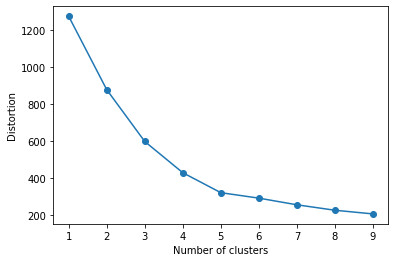

In [10]:
# 各kで算出されたSSEを格納するリストを定義
distortions = []

# kを変えながらk-means法を実行（全部できて3点）
for k  in range(1,10):              # 1~9クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_pca[:, 0:3])           # クラスタリングの計算を実行
    #第４主成分を取るなら0:3までを指定
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,10), distortions,marker='o') # 1から9でのSSEを順にプロット
plt.xticks([i for i in range(1, 10)])         # 横軸のメモリを1から9までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### 最適なクラスタ数は何であると考えられるか？（1点）  
最適なクラスタ数は3

### 5) あなたが回答した最適クラスタ数でのクラスタリングを行い、第1主成分,第２主成分を軸とする２次元平面上のサンプル散布図をクラスタリング結果のラベルで色分けしたグラフを表示してください。また、セントロイドも同時に表示してください。（3点）

なお、k-means法を実行する際はinit=k-means++で実行してください

In [11]:
# コード改変禁止
# クラスタリングの結果をプロットする関数
# 関数名kmeans_plot(クラスタの数, 学習器, 学習データ)
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

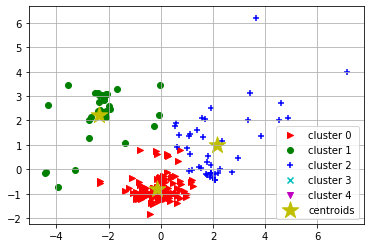

In [13]:
# クラスタリングの結果を出力（全部できて2点）
# クラスタごとにサンプルの散布図とクラスタの中心をプロット
km = KMeans(n_clusters=3,                        # クラスタ数
            init='random',                       # セントロイドの初期値をk-means++法で設定
            n_init=10,                           # セントロイドの初期値を変えての繰り返し回数を指定（１０）
            max_iter=300,                        # 一回の最適化の繰り返し回数を指定（３００）
            random_state=0) 

# 結果の表示（1点）
kmeans_plot(5, km, X_pca[:,0:4])